In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df_train = pd.read_csv(r'C:\Users\lenovo\Downloads\DS_Practice\House-Price-Prediction-MachineHack\Data\Train.csv')
df_test = pd.read_csv(r'C:\Users\lenovo\Downloads\DS_Practice\House-Price-Prediction-MachineHack\Data\Test.csv')

In [3]:
df_train.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [4]:
df_test.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 69.4+ KB


# Data Preprocessing

#### Calculate null values in train dataframe column wise.

In [7]:
df_train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

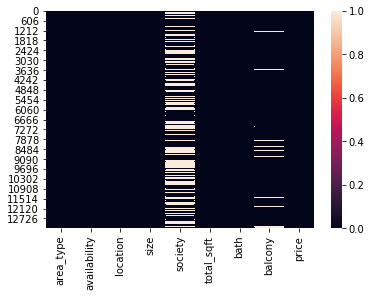

In [8]:
## Graphical representation of count of null values in train dataframe.
sns.heatmap(df_train.isnull())
plt.show()

#### Find percentage of data which is missing.

In [9]:
missing_values = df_train.isnull().sum()

total_cells = np.product(df_train.shape)
total_missing = missing_values.sum()

percent_missing = (total_missing/total_cells)*100
percent_missing

5.172672672672673

#### Find sum of null values in test dataframe.

In [10]:
df_test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

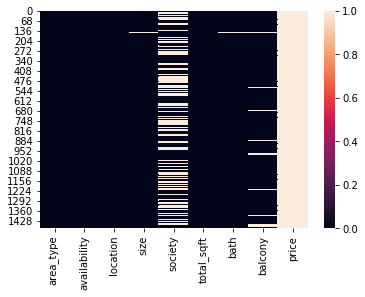

In [11]:
## Graphical representation of count of null values in test dataframe.
sns.heatmap(df_test.isnull())
plt.show()

#### Now we will select numerical and categorical features from train dataframe.

In [12]:
## Select object data type columns. 
object_columns_train = df_train.select_dtypes(include=['object'])

## Select numeric data type columns.
numerical_columns_train =df_train.select_dtypes(exclude=['object'])

Number of null values in each object data type column

In [13]:
null_counts = object_columns_train.isnull().sum()
print("Number of null values in each object type column:\n{}".format(null_counts))

Number of null values in each object type column:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
dtype: int64


#### Fill missing values in society column with 'None'.

In [14]:
object_columns_train['society'] = object_columns_train['society'].fillna('None')

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Fill missing values in size & location column with most frequent value.

In [15]:
cols = ['size', 'location']
object_columns_train[cols] = object_columns_train[cols].fillna(object_columns_train.mode().iloc[0])

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Number of null values in each numeric columns

In [16]:
null_counts = numerical_columns_train.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
bath        73
balcony    609
price        0
dtype: int64


#### FIll missing values in bath column with its median.

In [17]:
median = numerical_columns_train['bath'].median()
numerical_columns_train['bath'] = numerical_columns_train['bath'].fillna(median)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Fill missing values in balcony column with 0

In [18]:
numerical_columns_train['balcony'] = numerical_columns_train['balcony'].fillna(0)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
# Evaluation :- np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

### Find correlation between columns in train dataframe.

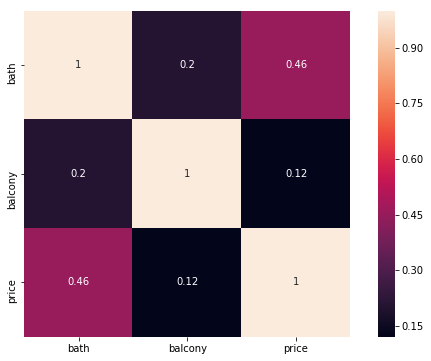

In [20]:
# Compute the correlation matrix
corrmat = df_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(corrmat, annot=True, square=True);

### Aanalysis of house 'price' through graphs.

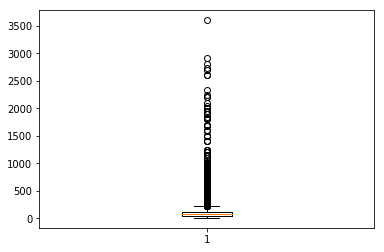

In [21]:
plt.boxplot(df_train['price'])
plt.show()

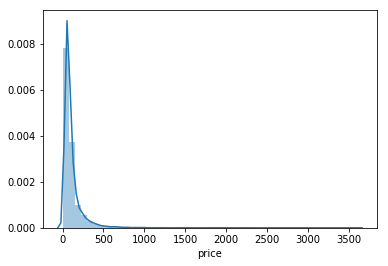

In [22]:
sns.distplot(df_train['price'])
plt.show()

In [23]:
df_train['price'].mean()

112.5656265015015

In [24]:
## Change price value into logarithmic value to make clear graph.
log_price = np.log(df_train['price'])

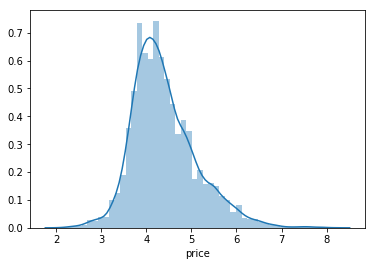

In [25]:
sns.distplot(log_price)
plt.show()

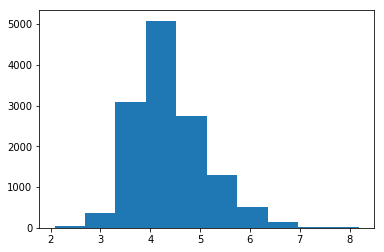

In [26]:
plt.hist(log_price)
plt.show()

### Plot graph between price, balcony and bathrooms columns.

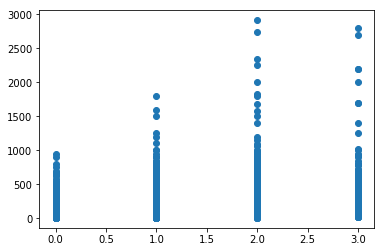

In [27]:
## Scatter plot between price and balcony of house.
plt.scatter(x= 'balcony', y ='price', data=df_train)

#### Analyse bathroom columns or plot a graph and find outliners or extreme value in bath column.

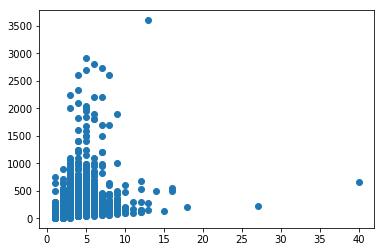

In [28]:
## Scatter plot between price and bath rooms in a house.
plt.scatter(x= 'bath', y ='price', data=df_train)

In [29]:
extreme_bathroom = (df_train['bath'] >15).sum()
extreme_bathroom

5

### Analysis area_type column in train dataframe.

Frequency distribution of area_type column. 

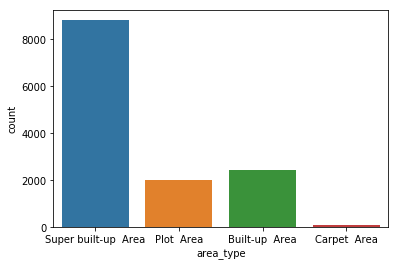

In [30]:
sns.countplot(x='area_type', data=df_train)

Boxplot between area_type and logarithmic value of price.

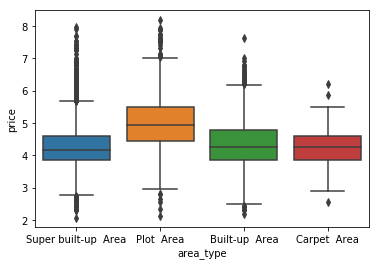

In [31]:
sns.boxplot(x='area_type', y=log_price, data=df_train)

#### Frequency Distribution of balcony column.

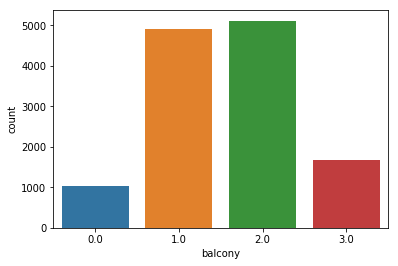

In [32]:
sns.countplot(x='balcony', data=df_train)

#### After making some plots we found that we have some columns with low variance so we decide to delete them.

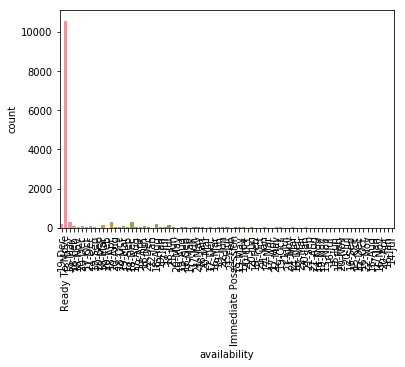

In [33]:
sns.countplot(x='availability', data=df_train)
plt.xticks(rotation = 'vertical')
plt.show()

## Model Development

In [34]:
## Remove availability column from dataset due to low variance.

object_columns_train.drop(['availability'], axis=1, inplace=True)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
#Using One hot encoder on categorical variables 

object_columns_train = pd.get_dummies(object_columns_train, columns= object_columns_train.columns) 

In [36]:
object_columns_train.head(3)

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Concat Categorical (after encoding) and numerical features

In [37]:
df_final_train = pd.concat([object_columns_train, numerical_columns_train], axis=1,sort=False)
df_final_train.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,...,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,bath,balcony,price
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,1.0,39.07
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,3.0,120.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,3.0,62.00
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,1.0,95.00
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,1.0,51.00


In [38]:
df_final_train.shape

(13320, 6149)

In [40]:
## Make copy of train & test dataset.
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [41]:
## Drop price column which has to be predicted.

df_test_copy.drop(['price'], axis=1, inplace=True)

In [42]:
##Separate Train and Targets

target= df_final_train['price']

df_final_train.drop(['price'],axis=1, inplace=True)

In [43]:
target_log = np.log(target)

## Modeling